# Breast Cancer Binary Classification

In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
print(tf.__version__)

2.0.0


In [2]:
data = load_breast_cancer()
# Check the type of 'data'
print(type(data))

<class 'sklearn.utils.Bunch'>


In [3]:
# Here the data is a Bunch Object
# This basically acts like a dictionary
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# 'data' (the_attribute) means the input data
data.data.shape

(569, 30)

In [5]:
# (569, 30) -> 569 Observations and 30 Input features.
# 'target'
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
# The meaning of target i.e 0 and 1
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
# Shape of the target
data.target.shape

(569,)

In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
# import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split
X = data.data
Y = data.target
# split the data into train and test sets
# this lets us simulate how our model will perform in test sets.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [10]:
print(f'The shape of our train set is: {X_train.shape}')

m, n = X_train.shape
# m and n are the number of training samples and input features respectively.

The shape of our train set is: (381, 30)


In [11]:
# Scale the data
# Normalization Z = (x - mhu)/std
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [12]:
# Build the Model

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(n,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Alternative way of initializing the Sequential Class of Keras module
# model = tf.keras.models.Sequential() # creating a class object
# model.add(tf.keras.layers.Dense(1, input_shape=(n,), activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Train the model
results = model.fit(x=X_train, 
                    y=y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=100,
                   shuffle=True,
                   steps_per_epoch=None,
                   validation_steps=None,
                   workers=4,
                   use_multiprocessing=True)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 3ms/sample - loss: 0.9164 - accuracy: 0.4068 - val_loss: 0.8371 - val_accuracy: 0.4362
Epoch 2/100
381/381 [==============================] - 0s 172us/sample - loss: 0.8345 - accuracy: 0.4856 - val_loss: 0.7602 - val_accuracy: 0.5106
Epoch 3/100
381/381 [==============================] - 0s 150us/sample - loss: 0.7602 - accuracy: 0.5722 - val_loss: 0.6942 - val_accuracy: 0.5904
Epoch 4/100
381/381 [==============================] - 0s 143us/sample - loss: 0.6988 - accuracy: 0.6509 - val_loss: 0.6369 - val_accuracy: 0.6436
Epoch 5/100
381/381 [==============================] - 0s 162us/sample - loss: 0.6429 - accuracy: 0.7165 - val_loss: 0.5891 - val_accuracy: 0.7128
Epoch 6/100
381/381 [==============================] - 0s 134us/sample - loss: 0.5981 - accuracy: 0.7533 - val_loss: 0.5468 - val_accuracy: 0.7713
Epoch 7/100
381/381 [==============================] - 0s 167us/sample - l

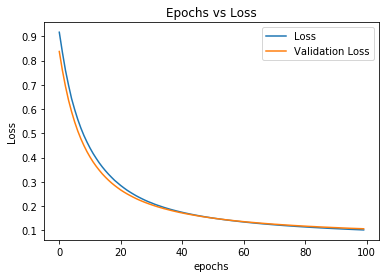

In [13]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(results.history['loss'], label='Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title("Epochs vs Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

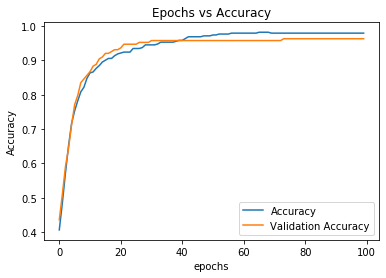

In [14]:
# Plot what's returned by model.fit() for accuracy
plt.plot(results.history['accuracy'], label='Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title("Epochs vs Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Part 2: Making Predictions


In [16]:
# make predictions
prediction = model.predict(X_test)
print(prediction) # They are outputs of the sigmoid, interpreted as probabilities p(y=1|x)

[[9.95149016e-01]
 [7.31090605e-01]
 [9.99662042e-01]
 [8.96081805e-01]
 [9.79826212e-01]
 [1.88052654e-04]
 [9.60815310e-01]
 [1.64474040e-01]
 [9.60438967e-01]
 [0.00000000e+00]
 [9.92491603e-01]
 [3.22818756e-04]
 [1.80601180e-02]
 [8.71188879e-01]
 [9.91705894e-01]
 [2.89345503e-01]
 [9.78712559e-01]
 [1.42237008e-01]
 [9.97049153e-01]
 [9.46582913e-01]
 [9.88730967e-01]
 [9.03620243e-01]
 [5.54323196e-06]
 [9.98112440e-01]
 [9.94852185e-01]
 [2.11575627e-03]
 [7.03815103e-01]
 [5.68032265e-05]
 [3.09914351e-02]
 [9.72569823e-01]
 [8.54902387e-01]
 [9.98453259e-01]
 [8.60807061e-01]
 [3.84902954e-03]
 [9.98884201e-01]
 [9.87714648e-01]
 [8.54524255e-01]
 [9.80543494e-01]
 [7.50900984e-01]
 [2.15715170e-03]
 [4.49241906e-01]
 [9.52568889e-01]
 [6.59255981e-02]
 [1.15865469e-03]
 [1.80231929e-02]
 [9.68031108e-01]
 [5.86032391e-01]
 [1.00699484e-01]
 [9.99331832e-01]
 [6.95454776e-02]
 [7.88800836e-01]
 [9.34261560e-01]
 [9.86307621e-01]
 [1.46276832e-01]
 [9.86801684e-01]
 [9.988144

In [19]:
# Round to get the actual predictions
# note: Has to be flattened since the targes are size (m,) while the predictions are size (m,1)
import numpy as np
final_prediction = np.round(prediction).flatten()

print(final_prediction)

[1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0.]


In [38]:
# Calculate the Accuracy, compare it to evaluate() output
print("Manually Calculated Accuracy: ", np.mean(final_prediction == y_test))
print("Evaluate Output: ", model.evaluate(X_test, y_test, steps=1, batch_size=4 ))

Manually Calculated Accuracy:  0.9627659574468085
4/1 [========================================================================================================================] - 0s 2ms/sample - loss: 0.0547 - accuracy: 1.0000
Evaluate Output:  [0.002277352074359326, 1.0]


# Part 3: Saveing and Loading a Model

In [39]:
model.save('linearclassifier.h5')

In [40]:
!ls

'Linear Classification.ipynb'  'Linear Regression.ipynb'
 linearclassifier.h5	        moore.csv


In [41]:
# Let's load the model and confirm that it still works
# Note: There is a bug in Keras where load/save only works if you Don't use the Input() layer explicitly
# So make sure you define the model with ONLY Dense(1, input_shape=(n,))
# At least, until the bug is fixed
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

188/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.10698837786912918, 0.96276593]